In [1]:
import keras

from keras.datasets import imdb

Restricts the data to the 10,000 most frequently occurring words found in the data:

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

• The variables train_data and test_data are lists of reviews;

Each review is a list of word indices (encoding a sequence of words).

• train_labels and test_labels are lists of 0s and 1s

 where 0 stands for negative and 1 stands for positive.

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [4]:
 print('TRAIN DATA: ', train_data.shape)
print('labels: ', train_labels.shape)
print('TEST DATA: ', test_data.shape)
print('labels: ', test_labels.shape)

TRAIN DATA:  (25000,)
labels:  (25000,)
TEST DATA:  (25000,)
labels:  (25000,)


# Data
---



### One-hot encoding:

Encoding the integer sequences into a binary matrix

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Using Keras:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
max([max(sequence) for sequence in train_data])

9999

## • Setting aside a validadion set:

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Model
----

1. Build 
2. Compile
3. Fit

In [9]:
from keras import models
from keras import layers
from keras import optimizers
# for custom losses and metrics:
# from keras import losses 
# from keras import metrics 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 36ms/step - loss: 0.6023 - accuracy: 0.7031 - val_loss: 0.4095 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3453 - accuracy: 0.8961 - val_loss: 0.3132 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2341 - accuracy: 0.9280 - val_loss: 0.2794 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1873 - accuracy: 0.9395 - val_loss: 0.2890 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1482 - accuracy: 0.9551 - val_loss: 0.2791 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1194 - accuracy: 0.9650 - val_loss: 0.3070 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0964 - accuracy: 0.9736 - val_loss: 0.3205 - val_accuracy: 0.8816
Epoch 8/20
30

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

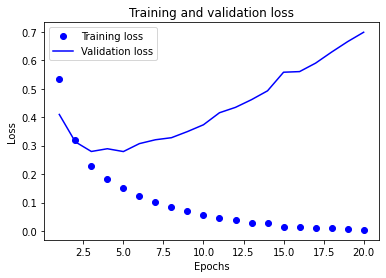

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

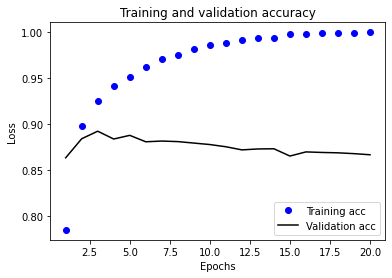

In [13]:
plt.clf()
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### OVERFITTING after epoch 2

### Retraining from scratch

Epoch 1/5
30/30 [==============================] - 1s 25ms/step - loss: 0.6016 - accuracy: 0.6950 - val_loss: 0.3626 - val_accuracy: 0.8685
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.3074 - accuracy: 0.8952 - val_loss: 0.2975 - val_accuracy: 0.8864
Epoch 3/5
30/30 [==============================] - 1s 18ms/step - loss: 0.2222 - accuracy: 0.9276 - val_loss: 0.2780 - val_accuracy: 0.8909
Epoch 4/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1806 - accuracy: 0.9436 - val_loss: 0.2764 - val_accuracy: 0.8897
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2987 - accuracy: 0.8790


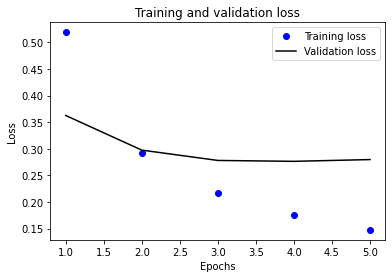


RESULTS:  [0.2986607849597931, 0.8789600133895874]


In [14]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'k', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('\nRESULTS: ', results)

In [19]:
model.predict(x_test)

array([[0.20693086],
       [0.9997856 ],
       [0.9798716 ],
       ...,
       [0.08905879],
       [0.1575146 ],
       [0.67486125]], dtype=float32)

The network is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

In [21]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])